## Importando Bibliotecas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Criando dados sintéticos

In [3]:
np.random.seed(1) #
X = np.random.uniform(low=0.0, high=10.0, size=(1000,))
slope = 0.25
intercept = -1.25
noise = np.random.normal(loc=0.0, scale=1.0, size=(1000,))

y = slope * X + intercept + noise

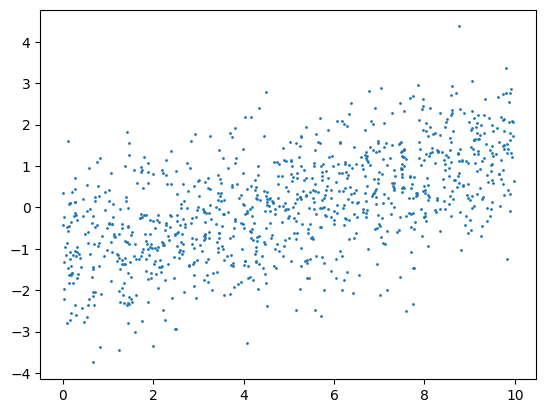

In [4]:
plt.scatter(X, y, s=1);

## Exercício 8 - Regressão Linear com o scikit-learn

### 8.1 Instanciando modelo

In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

### 8.2 Treinamento do modelo

In [6]:
X.reshape(-1, 1).shape

(1000, 1)

In [7]:
lr.fit(X.reshape(-1, 1), y)
lr.coef_, lr.intercept_

#a = lr.coef_
#b = lr.intercept_

#f(x) = a*X+b


(array([0.25106337]), np.float64(-1.2080021895763124))

### 8.3 Fazendo previsões

In [8]:
#lr.predict(np.array([0.01]).reshape(-1, 1))

In [9]:
y_pred = lr.predict(X.reshape(-1, 1))
y_pred[:10]

array([-0.16101268,  0.60046878, -1.20771504, -0.44895584, -0.8395519 ,
       -0.9761738 , -0.74037102, -0.34042577, -0.21186439,  0.14476928])

### 8.4 Plotando dados e linhas de regressão

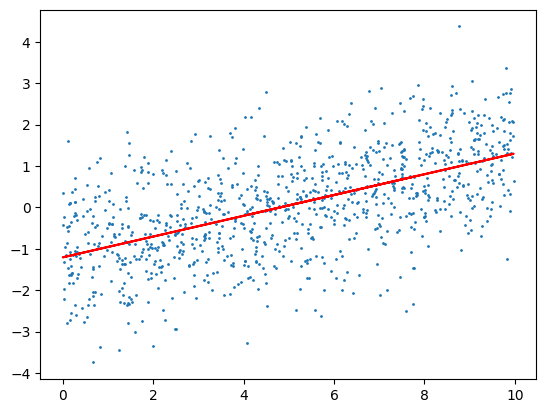

In [10]:
plt.scatter(X, y, s=1)
plt.plot(X, y_pred, 'r')

### Avaliação do modelo

#### Dividindo dados em treino e teste

In [11]:
URL = 'https://raw.githubusercontent.com/TrainingByPackt/Data-Science-Projects-with-Python/master/Data/Chapter_1_cleaned_data.csv'
df = pd.read_csv(URL)

In [12]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'none', 'others', 'university'],
      dtype='object')

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['EDUCATION'].values.reshape(-1, 1),
    df['default payment next month'].values,
    test_size=0.2,
    random_state=24)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

np.mean(y_train), np.mean(y_test)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


(np.float64(0.223102526838873), np.float64(0.21657603600225014))

#### Criando o modelo

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

#### Calculando a acurácia

In [23]:
acc = np.mean(y_pred == y_test)
## acc = sum(y_pred == y_test) / len(y_test)
acc

np.float64(0.7834239639977498)

In [25]:
np.unique(y_pred), np.unique(y_test, return_counts=True)

(array([0]), (array([0, 1]), array([4178, 1155])))

In [28]:
1 - 1155 / (4178 + 1155)

0.7834239639977498

#### Matrix de confusão

In [39]:
sum((y_pred==0) & (y_test==1))

np.int64(1155)

In [41]:
# É a contagem da combinação de resultados organizados em uma matriz
# modelo = 1 -> real = 1
# modelo = 0 -> real = 1
# modelo = 1 -> real = 0
# modelo = 0 -> real = 0

TP = sum((y_pred==1) & (y_test==1))
TN = sum((y_pred==0) & (y_test==0))
FP = sum((y_pred==1) & (y_test==0))
FN = sum((y_pred==0) & (y_test==1))

TP, TN, FP, FN

(np.int64(0), np.int64(4178), np.int64(0), np.int64(1155))

In [45]:
confusion_matrix = np.array([[TN, FP], [FN, TP]])
confusion_matrix

array([[4178,    0],
       [1155,    0]])

In [43]:
acuracia = (TP + TN) / (TP + TN + FP + FN)
acuracia

np.float64(0.7834239639977498)

In [48]:
sum(confusion_matrix.diagonal()) / confusion_matrix.sum()

np.float64(0.7834239639977498)